In [1]:
from __future__ import print_function
from win32com.client.gencache import EnsureDispatch, EnsureModule
from win32com.client import CastTo, constants
from win32com.client import gencache
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:

# Notes
#
# The graphics for this file to run properly require the pip module 'matplotlib'
# If you have the latest version of pip installed with python, you can install the required module by using the following CLI command:
#
#    python -m pip install matplotlib
#
# For more information, please see our Knowledgebase
#
# The python project and script was tested with the following tools:
#       Python 3.4.3 for Windows (32-bit) (https://www.python.org/downloads/) - Python interpreter
#       Python for Windows Extensions (32-bit, Python 3.4) (http://sourceforge.net/projects/pywin32/) - for COM support
#       Microsoft Visual Studio Express 2013 for Windows Desktop (https://www.visualstudio.com/en-us/products/visual-studio-express-vs.aspx) - easy-to-use IDE
#       Python Tools for Visual Studio (https://pytools.codeplex.com/) - integration into Visual Studio
#
# Note that Visual Studio and Python Tools make development easier, however this python script should should run without either installed.

class PythonStandaloneApplication(object):
    class LicenseException(Exception):
        pass

    class ConnectionException(Exception):
        pass

    class InitializationException(Exception):
        pass

    class SystemNotPresentException(Exception):
        pass

    def __init__(self):
        # make sure the Python wrappers are available for the COM client and
        # interfaces
        gencache.EnsureModule('{EA433010-2BAC-43C4-857C-7AEAC4A8CCE0}', 0, 1, 0)
        gencache.EnsureModule('{F66684D7-AAFE-4A62-9156-FF7A7853F764}', 0, 1, 0)
        # Note - the above can also be accomplished using 'makepy.py' in the
        # following directory:
        #      {PythonEnv}\Lib\site-packages\wind32com\client\
        # Also note that the generate wrappers do not get refreshed when the
        # COM library changes.
        # To refresh the wrappers, you can manually delete everything in the
        # cache directory:
        #	   {PythonEnv}\Lib\site-packages\win32com\gen_py\*.*
        
        self.TheConnection = EnsureDispatch("ZOSAPI.ZOSAPI_Connection")
        if self.TheConnection is None:
            raise PythonStandaloneApplication.ConnectionException("Unable to intialize COM connection to ZOSAPI")

        self.TheApplication = self.TheConnection.CreateNewApplication()
        if self.TheApplication is None:
            raise PythonStandaloneApplication.InitializationException("Unable to acquire ZOSAPI application")

        if self.TheApplication.IsValidLicenseForAPI == False:
            raise PythonStandaloneApplication.LicenseException("License is not valid for ZOSAPI use")

        self.TheSystem = self.TheApplication.PrimarySystem
        if self.TheSystem is None:
            raise PythonStandaloneApplication.SystemNotPresentException("Unable to acquire Primary system")

    def __del__(self):
        if self.TheApplication is not None:
            self.TheApplication.CloseApplication()
            self.TheApplication = None

        self.TheConnection = None

    def OpenFile(self, filepath, saveIfNeeded):
        if self.TheSystem is None:
            raise PythonStandaloneApplication.SystemNotPresentException("Unable to acquire Primary system")
        self.TheSystem.LoadFile(filepath, saveIfNeeded)

    def CloseFile(self, save):
        if self.TheSystem is None:
            raise PythonStandaloneApplication.SystemNotPresentException("Unable to acquire Primary system")
        self.TheSystem.Close(save)

    def SamplesDir(self):
        if self.TheApplication is None:
            raise PythonStandaloneApplication.InitializationException("Unable to acquire ZOSAPI application")

        return self.TheApplication.SamplesDir

    def ExampleConstants(self):
        if self.TheApplication.LicenseStatus is constants.LicenseStatusType_PremiumEdition:
            return "Premium"
        elif self.TheApplication.LicenseStatus is constants.LicenseStatusType_ProfessionalEdition:
            return "Professional"
        elif self.TheApplication.LicenseStatus is constants.LicenseStatusType_StandardEdition:
            return "Standard"
        else:
            return "Invalid"
        
def zemax_to_array(path_to_file):
    with open(path_to_file,'rb') as f:
        contents = f.read()
        
    contents = contents.decode("utf-16").split("\n")
    data_raw = [line.strip() for line in contents]
    
    metadata = []
    data = []
    
    for line in data_raw[:20]:
        if line != '':
            metadata.append(line)
            
    for line in data_raw[21:-1]:
        line = line.split("\t  ")
        line_formatted = [float(l) for l in line if l != '']
        data.append(line_formatted)
        
    return np.asarray(data), metadata

In [3]:
# Open Zemax 
zosapi = PythonStandaloneApplication()

In [4]:
TheSystem = zosapi.TheSystem
TheSystemData = TheSystem.SystemData
TheApplication = zosapi.TheApplication

In [5]:
# Open file
file_extension = "\\Users\\L.Desdoigts\\Desktop\\GSENSE\\on-axis\\"
file_name = "f36_595_1024sag.ZMX"

zosapi.OpenFile(file_extension + file_name, False)

IOpticalSystem = TheApplication.LoadNewSystem(file_name)

In [33]:
dir(TheSystemData.Wavelengths)

['AddWavelength',
 'CLSID',
 'GaussianQuadrature',
 'GetWavelength',
 'RemoveWavelength',
 'SelectWavelengthPreset',
 '_ApplyTypes_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_good_object_',
 '_get_good_single_object_',
 '_oleobj_',
 '_prop_map_get_',
 '_prop_map_put_',
 'coclass_clsid']

In [37]:
dir(TheSystemData.Wavelengths.GetWavelength(1))

['CLSID',
 'MakePrimary',
 '_ApplyTypes_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_good_object_',
 '_get_good_single_object_',
 '_oleobj_',
 '_prop_map_get_',
 '_prop_map_put_',
 'coclass_clsid']

In [42]:
num = TheSystemData.Wavelengths.NumberOfWavelengths 
for i in range(num-1):
    TheSystemData.Wavelengths.RemoveWavelength(2)

print(TheSystemData.Wavelengths.NumberOfWavelengths)

1


In [43]:
wl = TheSystemData.Wavelengths.GetWavelength(1)
print(wl.Wavelength)

0.5450006


In [32]:
Field = TheSystemData.Fields.GetField(1)

Field.X = 1

print(Field.X)
print(Field.Y)

1.0
0.0


In [9]:
TheSystemData.Fields.DeleteAllFields()

6

In [12]:
print(TheSystemData.Fields.GetField(1).X)

0.0


In [13]:
print(TheSystemData.Fields.GetField(1).Y)

0.0


In [14]:
print(TheSystemData.Fields.GetField(1).Weight)

1.0


In [45]:
MaxDeviation = 0.0073911555572 # degrees (20*lam/D @ 645nm)
NumSteps = 21 # 
Angles = np.linspace(0, MaxDeviation, NumSteps)
print(np.round(((Angles*np.pi)/180)*(0.1/645e-9))) # angluar values in lam/D

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


In [46]:
LambdaMin = 545e-9
LambdaMax = 645e-9
NumWavels = 21 
Wavels = np.linspace(LambdaMin, LambdaMax, NumWavels)*1e6
print(Wavels) # Wavelengths in microns

[0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595 0.6
 0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645]


In [60]:
# AngularSep = 0.0045756462764068315 # deg, ~16.5 arcsec
# # NumFields = TheSystemData.Fields.NumberOfFields

# # Set perturbation values
# MaxDeviation = AngularSep/20
# # This gives us a total range 

# Rs = np.linspace(AngularSep-MaxDeiviation, AngularSep+MaxDeiviation, num=100)

# TheSystemData.Fields.AddField(0, AngularSep, 1.0) # x, y, weight

<win32com.gen_py.ZOSAPI_Interfaces.IField instance at 0x2914033666816>

In [61]:
print(NumFields)
FieldNumbers = [1, NumFields+1] # 1 -> on axis, last field = AcenB
# output_names = ["on-axis_broadband", "off-axis_broadband"]

6


In [ ]:
%%time

Field = TheSystemData.Fields.GetField(1)
Wavel = TheSystemData.Wavelengths.GetWavelength(1)

for Angle in tqdm(Angles):
    for Wavelength in tqdm(Wavels, leave=False):
        
        # Set field and and wavelength
        Field.X = Angle
        Wavel.Wavelength = Wavelength
        
        # Get analysis
        TheAnalyses = TheSystem.Analyses
        newPsf = TheAnalyses.New_HuygensPsf()

        # Vary settings
        newPsf_Settings = newPsf.GetSettings()
        newPsf_SettingsCast = CastTo(newPsf_Settings, 'IAS_HuygensPsf')

        newPsf_SettingsCast.Field.SetFieldNumber(1) 
        newPsf_SettingsCast.Wavelength.SetWavelengthNumber(1) # 0 -> Use all wavelenghts

        newPsf_SettingsCast.PupilSampleSize = constants.SampleSizes_S_1024x1024
        newPsf_SettingsCast.ImageSampleSize = constants.SampleSizes_S_2048x2048

        newPsf_SettingsCast.Type = constants.HuygensPsfTypes_Linear
        newPsf_SettingsCast.ShowAsType = constants.HuygensShowAsTypes_FalseColor
        newPsf_SettingsCast.Rotation = constants.Rotations_Rotate_0

        newPsf_SettingsCast.Normalize = True

        newPsf_SettingsCast.UseCentroid = False
        newPsf_SettingsCast.UsePolarization = False
        newPsf_SettingsCast.ImageDelta = 1.625

        newPsf.ApplyAndWaitForCompletion()

        newPsf_Results = newPsf.GetResults()
        newPsf_ResultsCast = CastTo(newPsf_Results, 'IAR_')

        file_path = "\\Users\\L.Desdoigts\\Desktop\\ZMX_data"
        newPsf_ResultsCast.GetTextFile("{}\\PSF_{}_{}.txt".format(file_path, Wavelength*1e3, np.round(((Angle*np.pi)/180)*(0.1/645e-9))))

  0%|          | 0/21 [00:00<?, ?it/s]

In [63]:
# wavels = np.linspace(545, 645, num=11) 

# for i in tqdm(range(len(wavels) + 1)):

    # Get analysis
TheAnalyses = TheSystem.Analyses
newPsf = TheAnalyses.New_HuygensPsf()

# Vary settings
newPsf_Settings = newPsf.GetSettings()
newPsf_SettingsCast = CastTo(newPsf_Settings, 'IAS_HuygensPsf')

# Field 1 -> on axis
# Field 7 -> AcenB
newPsf_SettingsCast.Field.SetFieldNumber(7) 
newPsf_SettingsCast.Wavelength.SetWavelengthNumber(0) # 0 -> Use all wavelenghts

newPsf_SettingsCast.PupilSampleSize = constants.SampleSizes_S_512x512
newPsf_SettingsCast.ImageSampleSize = constants.SampleSizes_S_2048x2048

newPsf_SettingsCast.Type = constants.HuygensPsfTypes_Linear
newPsf_SettingsCast.ShowAsType = constants.HuygensShowAsTypes_FalseColor
newPsf_SettingsCast.Rotation = constants.Rotations_Rotate_0

newPsf_SettingsCast.Normalize = True

newPsf_SettingsCast.UseCentroid = False
newPsf_SettingsCast.UsePolarization = False
newPsf_SettingsCast.ImageDelta = 1.625

newPsf.ApplyAndWaitForCompletion()

newPsf_Results = newPsf.GetResults()
newPsf_ResultsCast = CastTo(newPsf_Results, 'IAR_')

newPsf_ResultsCast.GetTextFile("\\Users\\L.Desdoigts\\Desktop\\off-axis_broadband.txt")


# file_path = "\\Users\\L.Desdoigts\\Documents\\Zemax\\ZOS-API Projects\\PythonStandaloneApplication\\PythonStandaloneApplication\\"
# if i == 0:
#     newPsf_ResultsCast.GetTextFile(file_path + "broadband.txt")
# else:
#     newPsf_ResultsCast.GetTextFile("{}{}.txt".format(file_path, wavels[i-1]))


True

In [58]:
file_names = ["broadband"] + [str(wave) for wave in wavels]

data_arrays = []

for file_name in file_names:
    data, null = zemax_to_array("{}.txt".format(file_name))
    data_arrays.append(data)


# diff = on_axis_data - off_axis_data
# ims = [on_axis_data, off_axis_data, diff]

In [57]:
file_path = "\\Users\\L.Desdoigts\\Desktop\\Huygen_ims\\full-axial\\"

for i in range(len(data_arrays)):
    plt.figure()
    plt.imshow(data_arrays[i])
    if i == 0:
        plt.title(file_names[i])
    else:
        plt.title("{} nm".format(file_names[i]))
    plt.colorbar()
    plt.savefig("{}{}.jpg".format(file_path, file_names[i]))
    

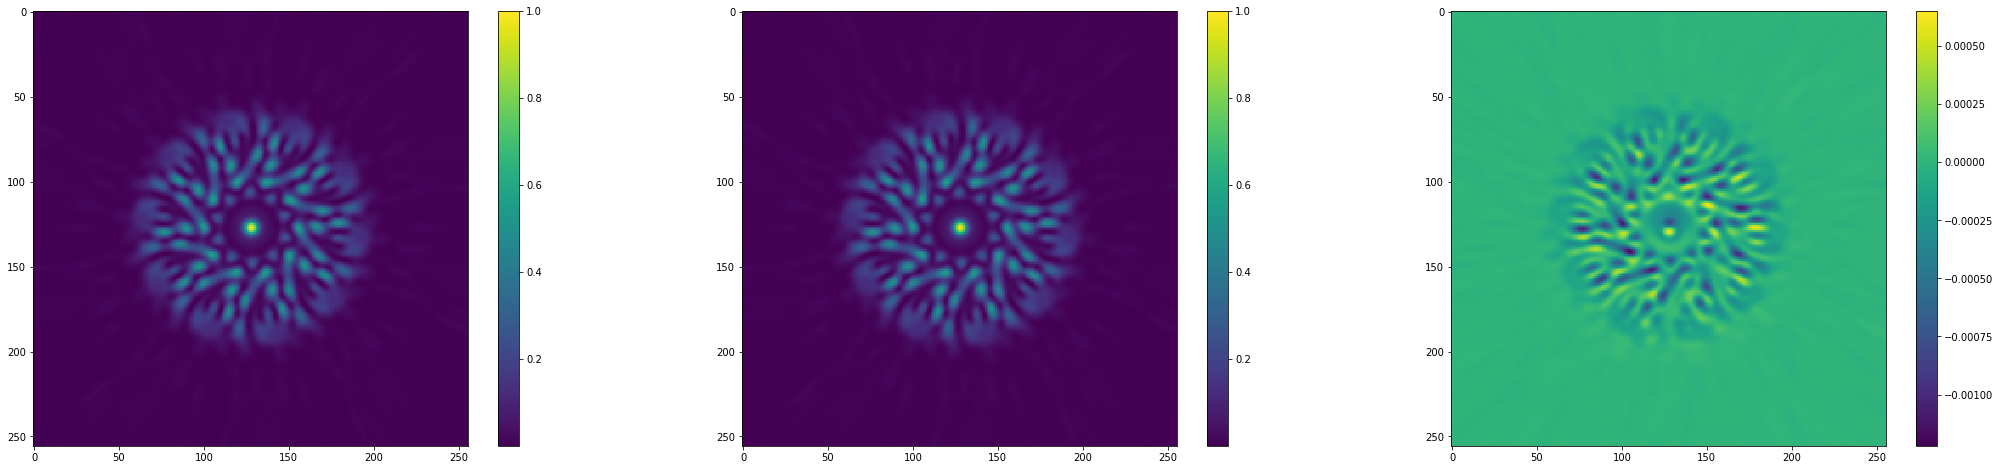

In [32]:
fig = plt.figure(figsize=(36,8))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(ims[i])
    plt.colorbar()

In [42]:
# Add tilt and decenter perturbations

TheLDE = TheSystem.LDE

Mirror = TheLDE.GetSurfaceAt(8)

Mirror.TiltDecenterData.BeforeSurfaceTiltX = 0.4
Mirror.TiltDecenterData.AfterSurfaceTiltX = 0.4

In [43]:
# Get analysis
TheAnalyses = TheSystem.Analyses
newPsf = TheAnalyses.New_HuygensPsf()

# Vary settings
newPsf_Settings = newPsf.GetSettings()
newPsf_SettingsCast = CastTo(newPsf_Settings, 'IAS_HuygensPsf')

newPsf_SettingsCast.Field.SetFieldNumber(0)
newPsf_SettingsCast.Wavelength.SetWavelengthNumber(0)

newPsf_SettingsCast.PupilSampleSize = constants.SampleSizes_S_128x128
newPsf_SettingsCast.ImageSampleSize = constants.SampleSizes_S_128x128

newPsf_SettingsCast.Type = constants.HuygensPsfTypes_Linear
newPsf_SettingsCast.ShowAsType = constants.HuygensShowAsTypes_FalseColor
newPsf_SettingsCast.Rotation = constants.Rotations_Rotate_0

newPsf_SettingsCast.Normalize = True
newPsf_SettingsCast.UseCentroid = False
newPsf_SettingsCast.UsePolarization = False
newPsf_SettingsCast.ImageDelta = 11.
# newPsf_SettingsCast.Configuration = 

In [44]:
newPsf.ApplyAndWaitForCompletion()

In [45]:
newPsf_Results = newPsf.GetResults()
newPsf_ResultsCast = CastTo(newPsf_Results, 'IAR_')

In [46]:
file_path = "\\Users\\L.Desdoigts\\Documents\\Zemax\\ZOS-API Projects\\PythonStandaloneApplication\\PythonStandaloneApplication\\"
arg = file_path + "results_test_tilt.txt"
print(newPsf_ResultsCast.GetTextFile(arg))

True


In [47]:
data_array, metadata = zemax_to_array(arg)

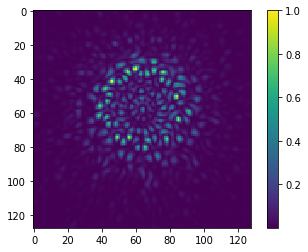

In [48]:
plt.imshow(data_array)
plt.colorbar()